In [2]:
from tools.data_reader import *
from tools.neural_network_integrator import *
from tools.visualization import *
from tools.eulers_method import *
from models.nn import *


%reload_ext autoreload
%autoreload 2

### NN with four sources


In [3]:
# data prepocessing
file_path = "data/postvis_four_sources_each500.traj"
columns, df_selected, train_data, val_data = data_reader(
    file_path, train_percentage=0.9, test_percentage=0.1
)
train_data.shape, val_data.shape, train_data[0, :, :]

startX-PID1     20.050923
endX-PID1       20.051391
simTime         16.400000
startY-PID1     36.597990
endY-PID1       35.970875
endTime-PID1    16.800000
Name: 5523, dtype: float64


((27195, 2, 3),
 (3022, 2, 3),
 array([[20.05092335, 20.05139059, 16.4       ],
        [36.59798997, 35.97087516, 16.8       ]]))

[0. 0. 0. ... 0. 0. 0.]


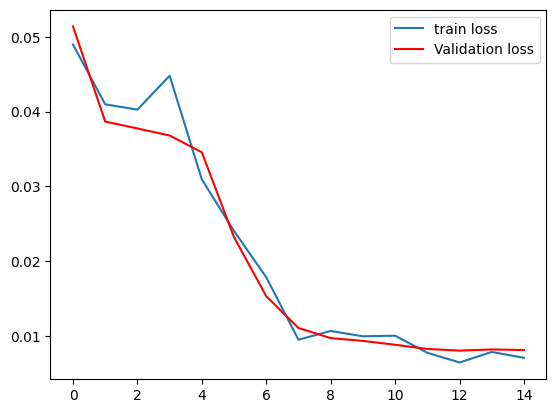

In [4]:
# parameters of neural network
lr = 0.0005
epochs = 50
batch_size = 128
width = 3
# initalize the model
model = Neural_network(width=width)
# train the model
train_loss_data, val_loss_data = train(
    model,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=1,
    method="euler",
)
plot_train_val_loss(train_loss_data, val_loss_data)
print(val_loss_data)

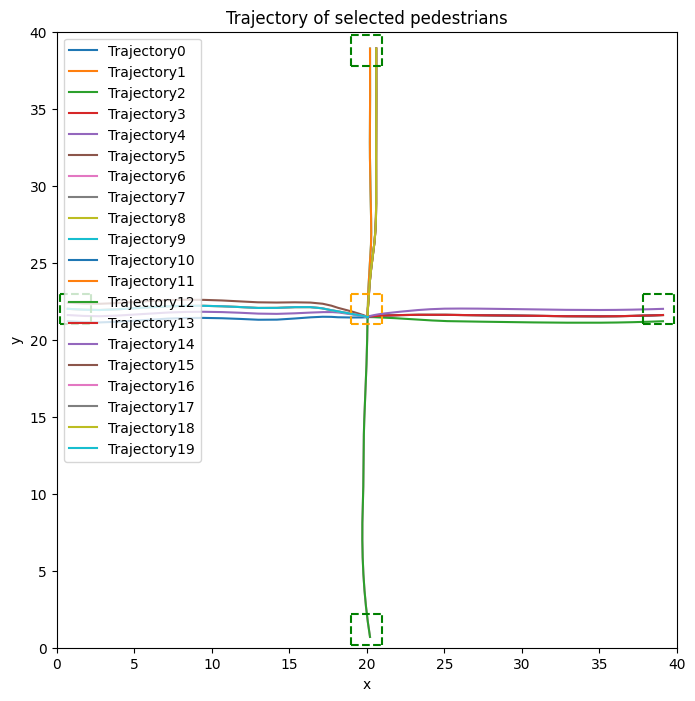

In [5]:
# simluate the trajectory
T_end = 500
num_selected_peds = 20
maximun_num_pedestrians = 500

traj = simulateRandomEuler(
    num_selected_peds, maximun_num_pedestrians, T_end, model, file_path
)
plot_traj(num_selected_peds, traj, background="4directions")

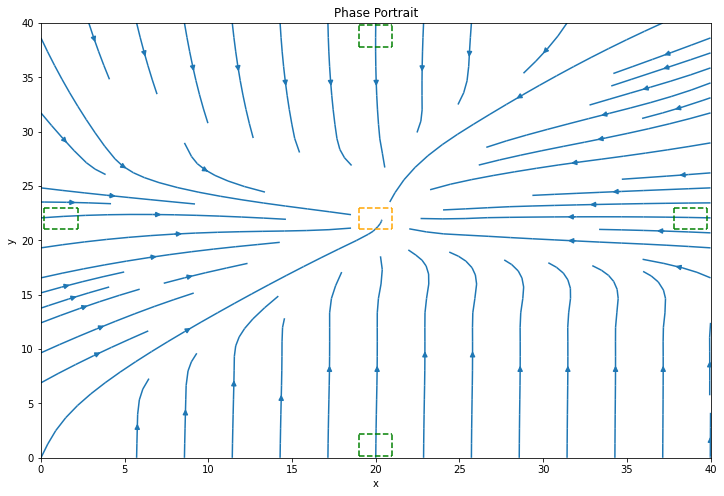

In [7]:
# plot the phase portrait
X, Y, U, V = phase_portrait(model)
plot_phase_portrait(X, Y, U, V, background="4directions")